In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.signal as sig

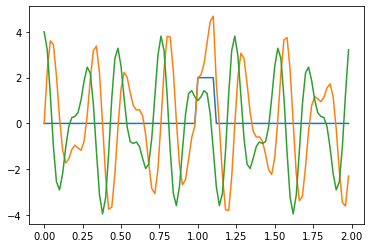

In [3]:
# create artifical signal
srate  = 50 # hz
time   = np.arange(0.,2.,1/srate) # time vector in seconds
pnts   = len(time) # number of time points+
ph_shift = 90*np.pi/180
burst = np.zeros(pnts)
burst[np.where(np.logical_and(time>=1, time<=1.1))] = 2
signal1 = 2.5 * np.sin( 2*np.pi*4*time ) + 1.5 * np.sin( 2*np.pi*6.5*time )+burst
signal2 = 2.5 * np.sin( 2*np.pi*4*time +ph_shift) + 1.5 * np.sin( 2*np.pi*6.5*time +ph_shift)
plt.plot(time,burst)
plt.plot(time,signal1)
plt.plot(time,signal2)

In [4]:
burst = np.zeros(pnts)
burst[np.where(np.logical_and(time>=1, time<=1.1))] = 2
burst

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
       2., 2., 2., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [5]:
def fft_amp_scaled_abs(fCoefs,fpos_range=[]):
    if type(fpos_range) is np.ndarray:
        fpos_range = len(fpos_range)
    else:
        if not fpos_range:
            fpos_range = len(fCoefs)
    
    return 2*np.abs(fCoefs)[0:fpos_range] / len(fCoefs)

def fft_freq_axis_hz(pnts,srate):
    return np.linspace(0,srate/2,num=math.floor(pnts/2.)+1)

fftCoef = np.fft.fft(signal1)
hz = fft_freq_axis_hz(pnts,srate)
famp= fft_amp_scaled_abs(fftCoef,hz)
PowerSpec = np.multiply(famp,famp)
logPowerSpec = np.log(PowerSpec)
Cepstrum = np.fft.ifft(logPowerSpec)

C:\ProgramData\Anaconda3\envs\mimiibaseTF2GPU\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


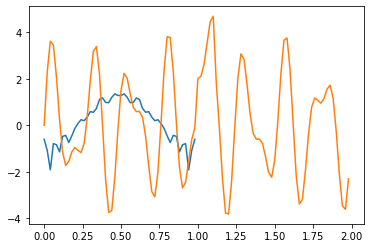

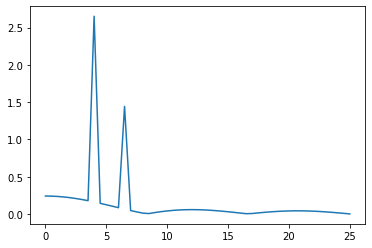

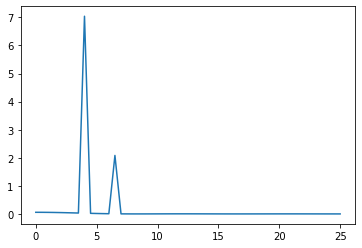

In [6]:
plt.plot(time[:len(Cepstrum[1:])],Cepstrum[1:])
plt.plot(time,signal1)
plt.show()
plt.plot(hz,famp)
plt.show()
plt.plot(hz,PowerSpec)
plt.show()


In [12]:
time.shape

(200,)

In [7]:
%run ..\..\utility\feature_extractor\cepstrum_accustic.py
cc =complex_cepstrum(signal1)
cc[0].shape
rc= real_cepstrum(signal1)
rc
#time.shape

array([ 0.54314038,  0.882107  , -0.02470527,  0.41256573, -0.262939  ,
        0.30838415, -0.72898516,  0.36221716, -0.2125383 ,  0.36546154,
       -0.25581874,  0.32050181, -0.48009591,  0.36042069, -0.19529427,
        0.40047992, -0.23049235,  0.29981982, -0.4924503 ,  0.20028779,
       -0.36808452,  0.28300269, -0.2420093 ,  0.40492453, -0.27741056,
        0.36722595, -0.27331156,  0.27771724, -0.3287717 ,  0.29257835,
       -0.34578498,  0.31321014, -0.29852755,  0.25568762, -0.36383891,
        0.26439775, -0.32200549,  0.38296846, -0.16899225,  0.40248313,
       -0.26804406,  0.26439518, -0.4219064 ,  0.19989247, -0.34930476,
        0.29560951, -0.27284369,  0.35575722, -0.28362205,  0.31075002,
       -0.28837123,  0.31075002, -0.28362205,  0.35575722, -0.27284369,
        0.29560951, -0.34930476,  0.19989247, -0.4219064 ,  0.26439518,
       -0.26804406,  0.40248313, -0.16899225,  0.38296846, -0.32200549,
        0.26439775, -0.36383891,  0.25568762, -0.29852755,  0.31

C:\ProgramData\Anaconda3\envs\mimiibaseTF2GPU\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


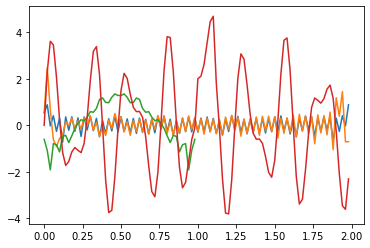

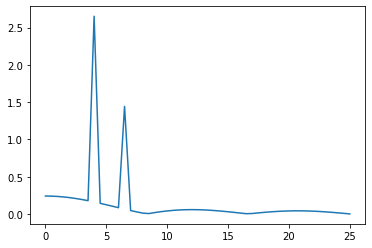

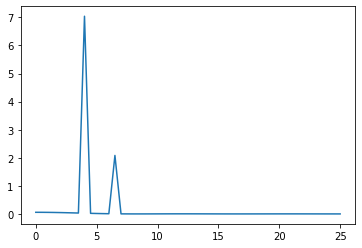

In [8]:
plt.plot(time,rc)
plt.plot(time,cc[0])
plt.plot(time[:len(Cepstrum[1:])],Cepstrum[1:])
plt.plot(time,signal1)
plt.show()
plt.plot(hz,famp)
plt.show()
plt.plot(hz,PowerSpec)
plt.show()

In [ ]:
# https://www.mathworks.com/help/dsp/ref/dsp.autocorrelator-system-object.html

23131.0
-23350.0


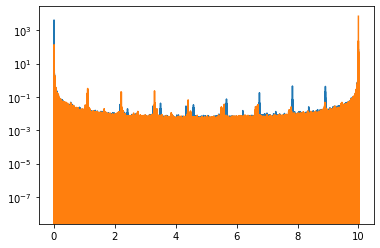

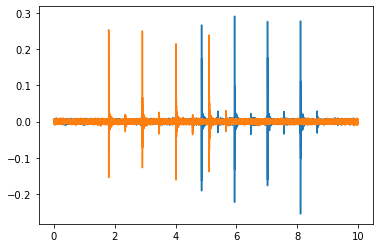

In [11]:
%matplotlib inline
import librosa
file_path = r'A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\valve\id_02\abnormal\00000002.wav'
file_path2 = r'A:\Dev\NF_Prj_MIMII_Dataset\dataset\6dB\valve\id_02\normal\00000002.wav'
audio_ch  = librosa.load(file_path, sr=None, mono=False)
data=audio_ch[0][1]
rate=audio_ch[1]
atime = np.linspace(0,len(data)/rate,len(data))
cc= complex_cepstrum(data)
audio_ch  = librosa.load(file_path2, sr=None, mono=False)
data2=audio_ch[0][1]
rate=audio_ch[1]
cc2= complex_cepstrum(data2)
plt.plot(atime,cc[0])
print(cc[1])
plt.plot(atime,cc2[0])
print(cc2[1])

#plt.xscale('log')
plt.yscale('log')
plt.show()
plt.plot(atime,data)
plt.plot(atime,data2)

In [69]:
t = np.linspace(0,1.27,127)
s1 = np.sin(2*np.pi*45*t)
Sn =0.8* np.append(np.zeros(20),s1[1:108])
s2 = s1 + Sn
cc, delay =complex_cepstrum(s2)

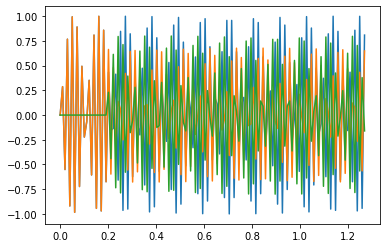

array(1.)

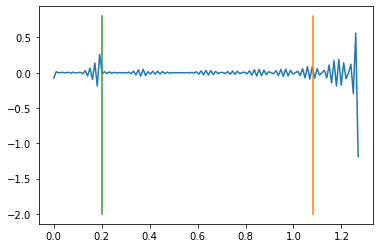

In [70]:
plt.plot(t,s1)
plt.plot(t,s2)
plt.plot(t,Sn)

plt.show()
plt.plot(t,cc)
plt.plot([1.08,1.08 ],[-2, 0.8])
plt.plot([0.20,0.20 ],[-2, 0.8])
delay